Import libraries

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import zipfile as zip
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


Define constants

In [0]:
IMAGE_WIDTH=28
IMAGE_HEIGHT=28
IMAGE_CHANNELS=1
BATCH_SIZE=32
EPOCHS=30

Unzip file

In [0]:
with zip.ZipFile("/content/drive/My Drive/Colab Notebooks/storage/sign-language-mnist.zip") as zip_file:
    zip_file.extractall("/content/drive/My Drive/Colab Notebooks/storage/sign-language-mnist")

Prapere training data

In [0]:
def read_dataset(path):
    dataset=np.genfromtxt(path,delimiter=",",skip_header=1)

    split_result=np.split(dataset, [1], axis=1)
    Y=split_result[0]
    X=split_result[1]    
    return X,Y

In [0]:
X,Y=read_dataset("/content/drive/My Drive/Colab Notebooks/storage/sign-language-mnist/sign_mnist_train.csv")

In [0]:
X_train, X_valid, Y_train, Y_valid=train_test_split(X, Y, test_size=0.2, random_state=42)
X_train=X_train.reshape((-1,IMAGE_WIDTH,IMAGE_HEIGHT))
X_valid=X_valid.reshape((-1,IMAGE_WIDTH,IMAGE_HEIGHT))
X_train=X_train/255
X_valid=X_valid/255

In [0]:
X_gray_train=X_train.reshape((-1,IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS))
X_gray_valid=X_valid.reshape((-1,IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS))

In [7]:
print(X_gray_train.shape)
print(X_gray_valid.shape)
print(Y_train.shape)
print(Y_valid.shape)

(21964, 28, 28, 1)
(5491, 28, 28, 1)
(21964, 1)
(5491, 1)


In [0]:
def show_batch(image_batch,label_batch):    
    plt.style.use('grayscale')
    plt.figure(figsize=(10,10))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(4,8,n+1)
        plt.imshow(image_batch[n])
        plt.title(label_batch[n])
        plt.axis('off')

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


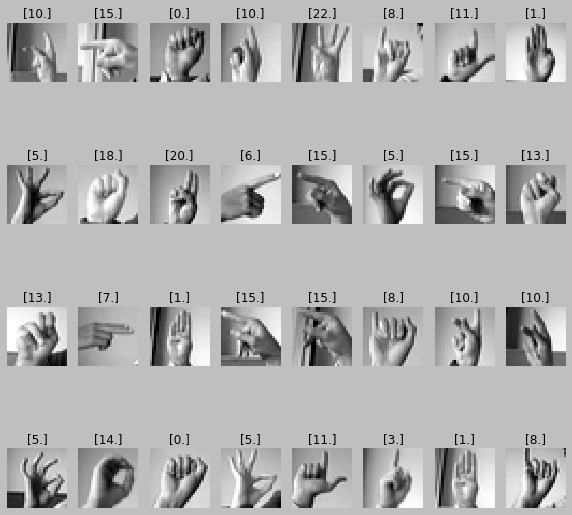

In [9]:
show_batch(X_gray_train[:BATCH_SIZE,:,:,:].reshape(-1,IMAGE_HEIGHT,IMAGE_WIDTH), Y_train[:BATCH_SIZE])

Create model

In [0]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8,(3,3),activation='relu',input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
    tf.keras.layers.AveragePooling2D(),

    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.AveragePooling2D(),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.AveragePooling2D(),

    tf.keras.layers.Flatten(),        
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')
])

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

Fit model

In [11]:
history=model.fit(X_gray_train,Y_train,epochs=EPOCHS,validation_data=(X_gray_valid,Y_valid))

Train on 21964 samples, validate on 5491 samples
Epoch 1/30
21964/21964 [==============================] - 6s 258us/sample - loss: 2.5470 - accuracy: 0.2016 - val_loss: 1.9091 - val_accuracy: 0.3755
Epoch 2/30
21964/21964 [==============================] - 3s 123us/sample - loss: 1.7172 - accuracy: 0.4287 - val_loss: 1.3378 - val_accuracy: 0.5449
Epoch 3/30
21964/21964 [==============================] - 3s 122us/sample - loss: 1.3517 - accuracy: 0.5326 - val_loss: 1.1367 - val_accuracy: 0.6083
Epoch 4/30
21964/21964 [==============================] - 3s 122us/sample - loss: 1.1065 - accuracy: 0.6073 - val_loss: 0.8319 - val_accuracy: 0.7195
Epoch 5/30
21964/21964 [==============================] - 3s 125us/sample - loss: 0.9171 - accuracy: 0.6714 - val_loss: 0.6355 - val_accuracy: 0.7713
Epoch 6/30
21964/21964 [==============================] - 3s 124us/sample - loss: 0.7829 - accuracy: 0.7176 - val_loss: 0.4948 - val_accuracy: 0.8443
Epoch 7/30
21964/21964 [===========================

Prapere testing data

In [0]:
X_test,Y_test=read_dataset("/content/drive/My Drive/Colab Notebooks/storage/sign-language-mnist/sign_mnist_test.csv")
X_test=X_test.reshape((-1,IMAGE_WIDTH,IMAGE_HEIGHT))
X_test=X_test/255

In [0]:
X_gray_test=X_test.reshape((-1,IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS))

In [14]:
print(X_gray_test.shape)
print(Y_test.shape)

(7172, 28, 28, 1)
(7172, 1)


Evaluate model

In [15]:
model.evaluate(X_gray_test,Y_test)

7172/7172 [==============================] - 1s 81us/sample - loss: 0.3278 - accuracy: 0.9031


[0.3278196815201858, 0.90309536]

Data augmentation

In [0]:
img_rotation_generator=tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=90)

In [0]:
np_rotation_iterator=tf.keras.preprocessing.image.NumpyArrayIterator(X_gray_train,Y_train,img_rotation_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


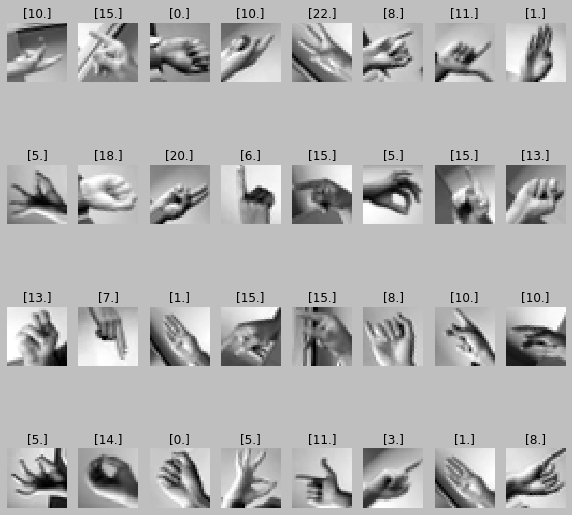

In [18]:
image_batch, label_batch = next(np_rotation_iterator)
show_batch(image_batch.reshape(-1,IMAGE_HEIGHT,IMAGE_WIDTH), label_batch)

In [0]:
img_shear_generator=tf.keras.preprocessing.image.ImageDataGenerator(shear_range=45.0)

In [0]:
np_shear_iterator=tf.keras.preprocessing.image.NumpyArrayIterator(X_gray_train,Y_train,img_shear_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


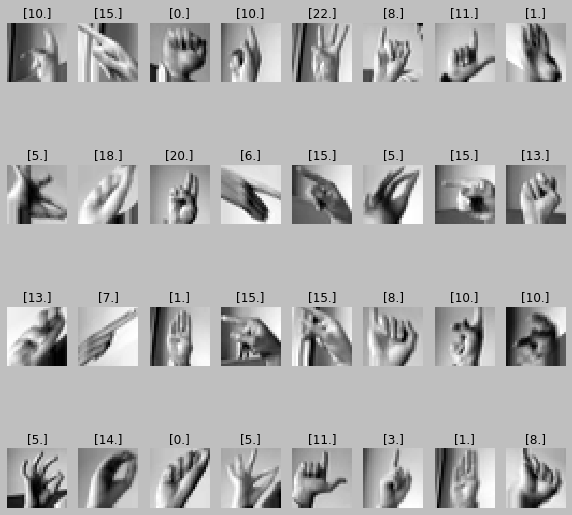

In [21]:
image_batch, label_batch = next(np_shear_iterator)
show_batch(image_batch.reshape(-1,IMAGE_HEIGHT,IMAGE_WIDTH), label_batch)

Fit model with data augmentation

In [22]:
history=model.fit(np_rotation_iterator,epochs=history.epoch[-1]+EPOCHS,validation_data=(X_gray_valid,Y_valid),initial_epoch=history.epoch[-1])
model.fit(np_shear_iterator,epochs=history.epoch[-1]+EPOCHS,validation_data=(X_gray_valid,Y_valid),initial_epoch=history.epoch[-1])

  ...
    to  
  ['...']
Train for 687 steps, validate on 5491 samples
Epoch 30/59
687/687 [==============================] - 6s 9ms/step - loss: 2.4877 - accuracy: 0.2899 - val_loss: 1.2073 - val_accuracy: 0.6527
Epoch 31/59
687/687 [==============================] - 6s 9ms/step - loss: 1.9190 - accuracy: 0.3911 - val_loss: 0.9170 - val_accuracy: 0.7339
Epoch 32/59
687/687 [==============================] - 6s 9ms/step - loss: 1.7154 - accuracy: 0.4451 - val_loss: 0.8725 - val_accuracy: 0.7274
Epoch 33/59
687/687 [==============================] - 6s 9ms/step - loss: 1.5718 - accuracy: 0.4789 - val_loss: 0.8127 - val_accuracy: 0.7276
Epoch 34/59
687/687 [==============================] - 6s 9ms/step - loss: 1.4785 - accuracy: 0.5030 - val_loss: 0.7349 - val_accuracy: 0.7654
Epoch 35/59
687/687 [==============================] - 6s 9ms/step - loss: 1.3795 - accuracy: 0.5337 - val_loss: 0.6691 - val_accuracy: 0.7873
Epoch 36/59
687/687 [==============================] - 6s 9ms/step - lo

Evaluate model after training on augmentation data

In [23]:
model.evaluate(X_gray_test,Y_test)

7172/7172 [==============================] - 0s 65us/sample - loss: 0.1858 - accuracy: 0.9414


[0.1858260271955454, 0.9414389]

Redefine constants

In [0]:
IMAGE_WIDTH=32
IMAGE_HEIGHT=32
IMAGE_CHANNELS=3

Create pretrained VGG16

In [0]:
base_model=tf.keras.applications.VGG16(
    input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

In [0]:
pretrained_model=tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),    
    tf.keras.layers.Dense(25, activation='softmax')
])

pretrained_model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [27]:
pretrained_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                12825     
Total params: 14,727,513
Trainable params: 12,825
Non-trainable params: 14,714,688
_________________________________________________________________


Prepare data for pretrained model

In [0]:
X_rgb_train=np.pad(X_train,((0,0),(2,2),(2,2)))
X_rgb_valid=np.pad(X_valid,((0,0),(2,2),(2,2)))
X_rgb_test=np.pad(X_test,((0,0),(2,2),(2,2)))

In [0]:
X_rgb_train=np.stack((X_rgb_train,)*3, axis=-1)
X_rgb_valid=np.stack((X_rgb_valid,)*3, axis=-1)
X_rgb_test=np.stack((X_rgb_test,)*3, axis=-1)

In [33]:
print(X_rgb_train.shape)
print(X_rgb_valid.shape)
print(X_rgb_test.shape)

(21964, 32, 32, 3)
(5491, 32, 32, 3)
(7172, 32, 32, 3)


In [0]:
np_rotation_iterator=tf.keras.preprocessing.image.NumpyArrayIterator(X_rgb_train,Y_train,img_rotation_generator,batch_size=BATCH_SIZE)
np_shear_iterator=tf.keras.preprocessing.image.NumpyArrayIterator(X_rgb_train,Y_train,img_shear_generator,batch_size=BATCH_SIZE)

Fit pretrained model

In [34]:
history=pretrained_model.fit(X_rgb_train,Y_train,epochs=EPOCHS,validation_data=(X_rgb_valid,Y_valid))

Train on 21964 samples, validate on 5491 samples
Epoch 1/30
21964/21964 [==============================] - 9s 422us/sample - loss: 2.0298 - accuracy: 0.5009 - val_loss: 1.4621 - val_accuracy: 0.6303
Epoch 2/30
21964/21964 [==============================] - 8s 358us/sample - loss: 1.2504 - accuracy: 0.6940 - val_loss: 1.0906 - val_accuracy: 0.7410
Epoch 3/30
21964/21964 [==============================] - 8s 356us/sample - loss: 0.9787 - accuracy: 0.7631 - val_loss: 0.8920 - val_accuracy: 0.7909
Epoch 4/30
21964/21964 [==============================] - 8s 361us/sample - loss: 0.8174 - accuracy: 0.8091 - val_loss: 0.7631 - val_accuracy: 0.8190
Epoch 5/30
21964/21964 [==============================] - 8s 370us/sample - loss: 0.7056 - accuracy: 0.8369 - val_loss: 0.6730 - val_accuracy: 0.8441
Epoch 6/30
21964/21964 [==============================] - 8s 367us/sample - loss: 0.6226 - accuracy: 0.8595 - val_loss: 0.6025 - val_accuracy: 0.8587
Epoch 7/30
21964/21964 [===========================

Evaluate pretrained model

In [35]:
pretrained_model.evaluate(X_rgb_test,Y_test)

7172/7172 [==============================] - 2s 326us/sample - loss: 0.3457 - accuracy: 0.9030


[0.3457407342011345, 0.90295595]

Fit pretrained model with data augmentation

In [38]:
history=pretrained_model.fit(np_rotation_iterator,epochs=history.epoch[-1]+EPOCHS,validation_data=(X_rgb_valid,Y_valid),initial_epoch=history.epoch[-1])
pretrained_model.fit(np_shear_iterator,epochs=history.epoch[-1]+EPOCHS,validation_data=(X_rgb_valid,Y_valid),initial_epoch=history.epoch[-1])

  ...
    to  
  ['...']
Train for 687 steps, validate on 5491 samples
Epoch 30/59
687/687 [==============================] - 12s 18ms/step - loss: 5.0760 - accuracy: 0.3093 - val_loss: 1.7829 - val_accuracy: 0.5618
Epoch 31/59
687/687 [==============================] - 12s 18ms/step - loss: 2.9460 - accuracy: 0.4073 - val_loss: 1.2443 - val_accuracy: 0.6383
Epoch 32/59
687/687 [==============================] - 12s 17ms/step - loss: 2.3801 - accuracy: 0.4604 - val_loss: 0.8433 - val_accuracy: 0.7212
Epoch 33/59
687/687 [==============================] - 12s 17ms/step - loss: 2.0860 - accuracy: 0.4907 - val_loss: 0.6912 - val_accuracy: 0.7671
Epoch 34/59
687/687 [==============================] - 12s 18ms/step - loss: 1.8507 - accuracy: 0.5198 - val_loss: 0.5980 - val_accuracy: 0.7918
Epoch 35/59
687/687 [==============================] - 12s 18ms/step - loss: 1.6817 - accuracy: 0.5428 - val_loss: 0.5496 - val_accuracy: 0.8102
Epoch 36/59
687/687 [==============================] - 12s 

Evaluate pretrained model after training on augmentation data

In [39]:
pretrained_model.evaluate(X_rgb_test,Y_test)

7172/7172 [==============================] - 2s 296us/sample - loss: 0.5223 - accuracy: 0.8250


[0.5223141711847249, 0.82501394]